In [1]:
import pandas as pd
import numpy as np
import sqlite3
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# load data from database
conn = sqlite3.connect('fictionTaggingEngine.db')
processedAO3df = pd.read_sql('SELECT * FROM processedAO3data', conn)

In [3]:
def stripFlattenList(column):
    #strip strings and flatten lists
    tagList = []
    column = column.str.split(",")
    for index, outerList in enumerate(column):
        if outerList == None:
            continue
        else:
            strippedList = [s.strip() for s in outerList]
            tagList.append(strippedList)
        
    flattenedStrippedList = [item for sublist in tagList for item in sublist]

    return flattenedStrippedList

In [4]:
#flatten tag and fandomGenre columns in to lists for word cloud generation
fandomGenresList = stripFlattenList(processedAO3df['fandomGenres'])
tagList = stripFlattenList(processedAO3df['tags'])
tag_df = pd.DataFrame(tagList,columns=['tags'])
tag_df = tag_df[(tag_df.tags != 'disregardTags') & (tag_df.tags != 'needContextTags') & (tag_df.tags != 'mistakesAfootTags') & (tag_df.tags != 'textLengthTags')]

In [84]:
#create dataframe with all of the LGBTQIA Umbrella tags 
lgbtqia_df = tag_df[(tag_df.tags == 'lgbtqiaTags') | (tag_df.tags == 'demiTags') | (tag_df.tags == 'panTags') 
                    | (tag_df.tags == 'transTags') | (tag_df.tags == 'nonBinaryTags') | (tag_df.tags == 'aceTags') 
                    | (tag_df.tags == 'biTags') | (tag_df.tags == 'lesbiansTags') | (tag_df.tags == 'gayTags') 
                    | (tag_df.tags == 'sameSexTags') | (tag_df.tags == 'genderTags')]

In [85]:
#create dataframe with all of the character of color tags
characterOfColorTags_df = tag_df[(tag_df.tags == 'characterOfColorTags')]

In [86]:
#create dataframe with all of the disability tags
disability_df = tag_df[(tag_df.tags == 'disabilityTags') | (tag_df.tags == 'mentalCapacityTags') | (tag_df.tags == 'deafTags')]

In [87]:
#create dataframe with all of the illness tags
illness_df = tag_df[(tag_df.tags == 'illnessTags') | (tag_df.tags == 'mentalIllnessesTags') | (tag_df.tags == 'physicalIllnessTags')]

In [5]:
#create empty strings to generate word clouds
fandomGenresString = ''
tagString = ''

#adjust stop words
stopwords = set(STOPWORDS)
stopwords.update(["disregardTags", "needContextTags", "textLengthTags", "multiGenres"])

#iterate through the list
for val in fandomGenresList:
    fandomGenresString += " {} ".format(val)
    
for val in tagList:
    tagString += " {} ".format(val)

In [6]:
#create word clouds
tagCloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                collocations = False,
                min_font_size = 10).generate(tagString)

fandomGenreCloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                collocations = False,
                min_font_size = 10).generate(fandomGenresString)

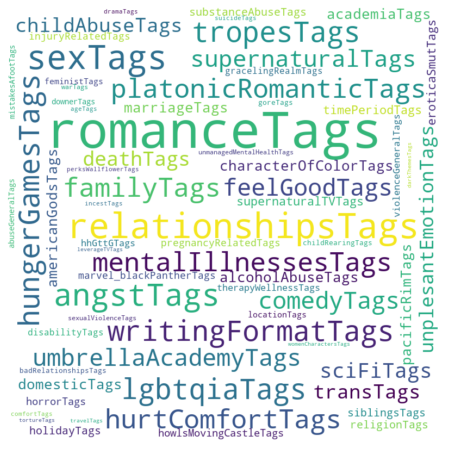

In [7]:
#plot the tag word cloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(tagCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

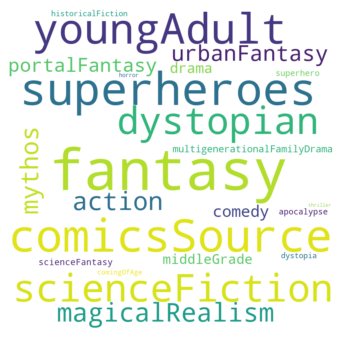

In [69]:
#plot the fandom genre word cloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(fandomGenreCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [66]:
tagCloud.to_file("tagCloud.png");

In [68]:
fandomGenreCloud.to_file("fandomGenreCloud.png");

In [88]:
totalFics = processedAO3df.shape[0]

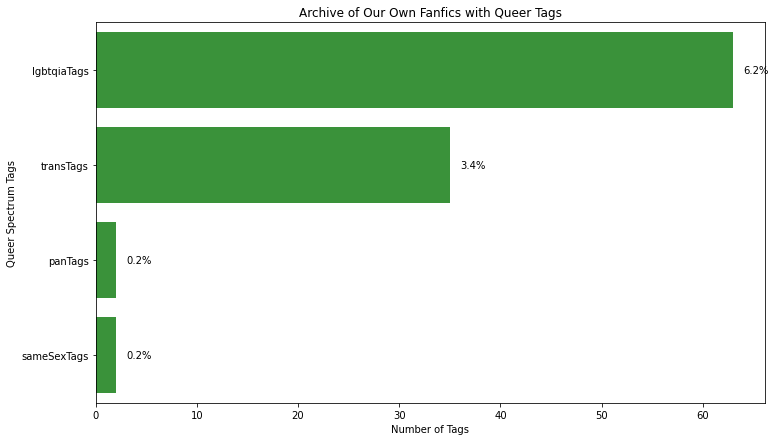

In [89]:
count_lgbtqiaUmbrellaTags = lgbtqia_df.tags.value_counts()
sequence_lgbtqiaUmbrellaTags = lgbtqia_df.tags.value_counts().index
fig = plt.figure(figsize=(12,7))
sb.countplot(data=lgbtqia_df, y='tags', color=sb.color_palette()[2], order=sequence_lgbtqiaUmbrellaTags)
plt.title('Archive of Our Own Fanfics with Queer Tags')
plt.xlabel('Number of Tags')
plt.ylabel('Queer Spectrum Tags');

for i in range (sequence_lgbtqiaUmbrellaTags.shape[0]):
    count = count_lgbtqiaUmbrellaTags[i]
    percent_value = '{:0.1f}%'.format(100*count/totalFics)
    plt.text(count+1, i, percent_value, va = 'center');

plt.savefig("lgbtqiaUmbrellaTags.png")

plt.show();

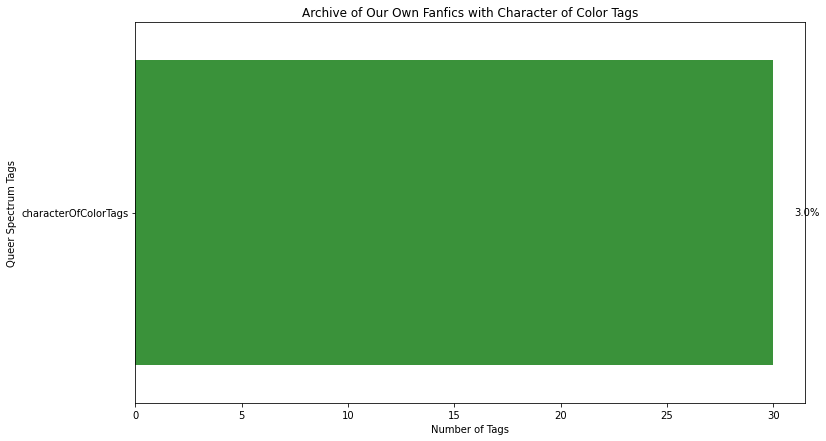

In [90]:
count_characterOfColorTags = characterOfColorTags_df.tags.value_counts()
sequence_characterOfColorTags = characterOfColorTags_df.tags.value_counts().index
fig = plt.figure(figsize=(12,7))
sb.countplot(data=characterOfColorTags_df, y='tags', color=sb.color_palette()[2], order=sequence_characterOfColorTags)
plt.title('Archive of Our Own Fanfics with Character of Color Tags')
plt.xlabel('Number of Tags')
plt.ylabel('Queer Spectrum Tags');

for i in range (sequence_characterOfColorTags.shape[0]):
    count = count_characterOfColorTags[i]
    percent_value = '{:0.1f}%'.format(100*count/totalFics)
    plt.text(count+1, i, percent_value, va = 'center');

plt.savefig("characterOfColorTags.png")

plt.show();

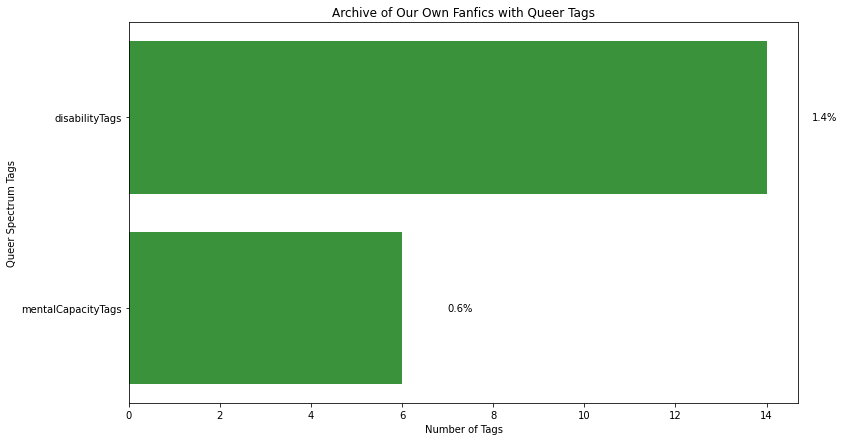

In [91]:
count_disabilityTags = disability_df.tags.value_counts()
sequence_disabilityTags = disability_df.tags.value_counts().index
fig = plt.figure(figsize=(12,7))
sb.countplot(data=disability_df, y='tags', color=sb.color_palette()[2], order=sequence_disabilityTags)
plt.title('Archive of Our Own Fanfics with Queer Tags')
plt.xlabel('Number of Tags')
plt.ylabel('Queer Spectrum Tags');

for i in range (sequence_disabilityTags.shape[0]):
    count = count_disabilityTags[i]
    percent_value = '{:0.1f}%'.format(100*count/totalFics)
    plt.text(count+1, i, percent_value, va = 'center');

plt.savefig("disabilityTags.png")

plt.show();

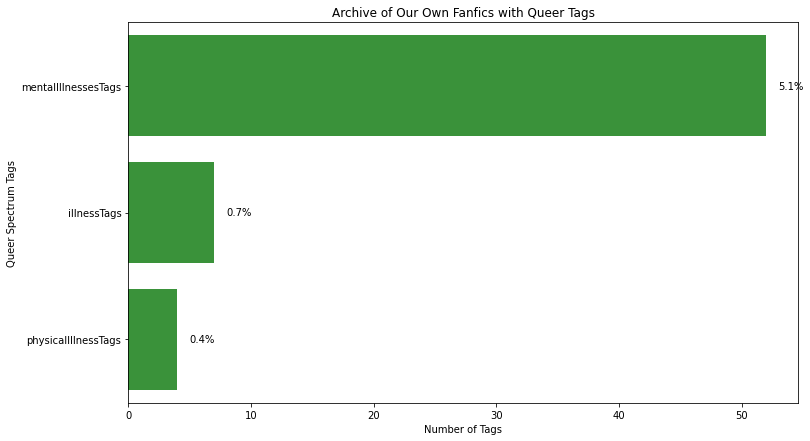

In [92]:
count_illnessTags = illness_df.tags.value_counts()
sequence_illnessTags = illness_df.tags.value_counts().index
fig = plt.figure(figsize=(12,7))
sb.countplot(data=illness_df, y='tags', color=sb.color_palette()[2], order=sequence_illnessTags)
plt.title('Archive of Our Own Fanfics with Queer Tags')
plt.xlabel('Number of Tags')
plt.ylabel('Queer Spectrum Tags');

for i in range (sequence_illnessTags.shape[0]):
    count = count_illnessTags[i]
    percent_value = '{:0.1f}%'.format(100*count/totalFics)
    plt.text(count+1, i, percent_value, va = 'center');

plt.savefig("illnessTags.png")

plt.show();